In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def diag3(a: np.array, b: np.array, c: np.array, f: np.array):
    n = b.shape[0]
    
    b1 = np.zeros(n)+b[0]
    for i in range(1, n):
        b1[i] = b[i]-a[i]*c[i-1]/b1[i-1]
    f1 = np.zeros(n)+f[0]
    for i in range(1, n):
        f1[i] = f[i]-a[i]*f1[i-1]/b1[i-1]

    x = np.zeros(n)+f1[n-1]/b1[n-1]
    for i in range(n-2, -1, -1):
        x[i] = (f1[i]-c[i]*x[i+1])/b1[i]
    return x

In [91]:
def jacobian(x: np.array, h:float, u:np.array):
    n = x.shape[0]
    d1 = np.zeros(n)+1/h/h
    d1[0], d1[n-1] = 0, 0
    d3 = np.zeros(n)+1/h/h
    d3[0], d3[n-1] = 0, 0
    d2 = (2/h/h+2*x*x)+2*np.log(u)
    d2[0], d2[n-1] = 1, 1
    return d1, d2, d3

def func(x: np.array, h:float, u:np.array):
    n = x.shape[0]
    f = np.zeros(n)
    for i in range(1, n-1):
        f[i] = (u[i+1]+u[i-1])/h/h - u[i]*(2/h/h+2*x[i]*x[i]-2*np.log(u[i])-2)
    return f

# we need a learning rate, so that the values do not get negative because of fluctuations, and ln gets undefined
def solve(n: int, iter: int, lr: float = 0.001):
    h = 1/(n-1)
    x = np.arange(n)*h
    u = np.exp(-x*x)+np.random.normal(size=n)*0.01
    u[0], u[n-1] = 1, 1/np.e

    for _ in range(iter):
        d1, d2, d3 = jacobian(x, h, u)
        f = func(x, h, u)
        du = diag3(d1, d2, d3, f)
        u+=du*lr

    return x, u

In [97]:
x_true = np.arange(513)/512
u_true = np.exp(-x_true*x_true)

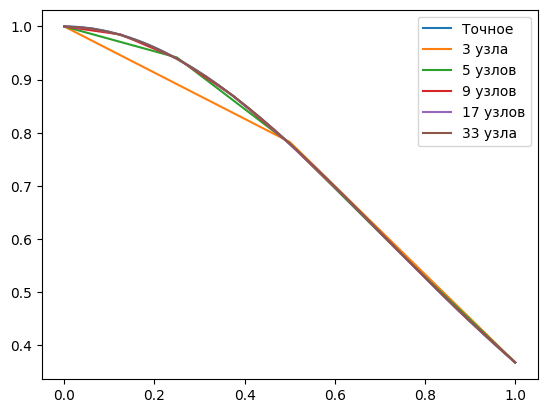

In [99]:
step = 2

err = []

plt.plot(x_true, u_true)

while step<64:
    x, u = solve(step+1,  100000)
    u_expected = np.zeros(u.shape[0])
    last = 0 
    for i in range(len(x_true)):
        if np.abs(x_true[i]-x[last])<0.0000001:
            u_expected[last] = u_true[i]
            last+=1
    err.append(np.linalg.norm(np.abs(u-u_expected), ord=np.inf))
    step*=2
    plt.plot(x, u)
plt.legend(["Точное", "3 узла", "5 узлов", "9 узлов", "17 узлов", "33 узла"])

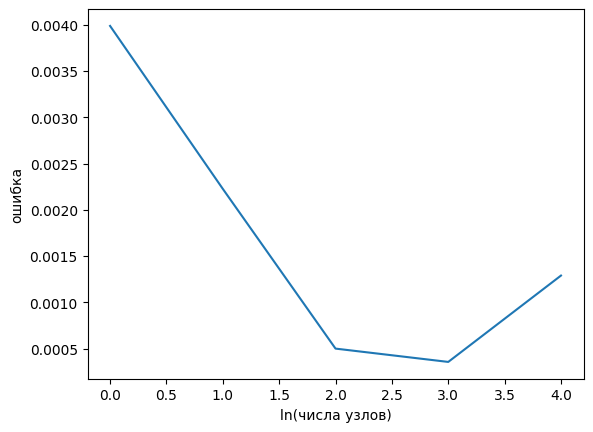

In [102]:
plt.plot(err)
plt.xlabel("ln(числа узлов)")
plt.ylabel("ошибка")
plt.show()